## Name: Mayuri Patel

1. Draw the structure/topology of a profile HMM for the following multiple alignments of protein sequences (Hint: first decide the length of the models). Train the model using the Laplace’s rule for pseudocounts.

A profile hidden Markov model is an extension of a standard HMM, where the emission and transition probabilities are position specific. That is, they can change at each point along the sequence. 

### Importing the modules

aphid is a R package for the development and application of hidden Markov models and profile HMMs for biological sequence analysis. While ape is use alongside with aphid.

In [1]:
#importing R packages:
#importing two libraries - aphid and ape
suppressWarnings(suppressMessages(library(aphid)))
suppressWarnings(suppressMessages(library(ape)))

### Profile Hidden Markov Models

In [2]:
#Creating the multiple sequence alignment matrix of amino acids

seqAlignment = matrix(c("S","F","M","V","P","V","D","-","-","-","A","P","C","Y","L","L","G","V","D","-","-","-","A","P","L","K","L","I","M","T","-","-","-","-","D","G","N","Y","L","-","-","-","-","-","-","-","I","P","N","L","L","-","-","-","-","-","-","-","L","P","N","Y","L","-","-","-","-","-","-","-","L","P","N","Y","I","-","-","-","-","-","-","-","V","P","N","R","L","-","-","-","-","-","-","-","L","P","E","N","-","-","-","-","-","-","Y","L","V","P","E","E","D","G","M","-","D","D","V","I","Y","P"), nrow = 10, byrow=TRUE)

seqAlignment

S,F,M,V,P,V,D,-,-,-,A,P
C,Y,L,L,G,V,D,-,-,-,A,P
L,K,L,I,M,T,-,-,-,-,D,G
N,Y,L,-,-,-,-,-,-,-,I,P
N,L,L,-,-,-,-,-,-,-,L,P
N,Y,L,-,-,-,-,-,-,-,L,P
N,Y,I,-,-,-,-,-,-,-,V,P
N,R,L,-,-,-,-,-,-,-,L,P
E,N,-,-,-,-,-,-,Y,L,V,P
E,E,D,G,M,-,D,D,V,I,Y,P


The following code derives a profile HMM from the amino acid sequence alignment and plots the model:

Applying uniform sequence weights


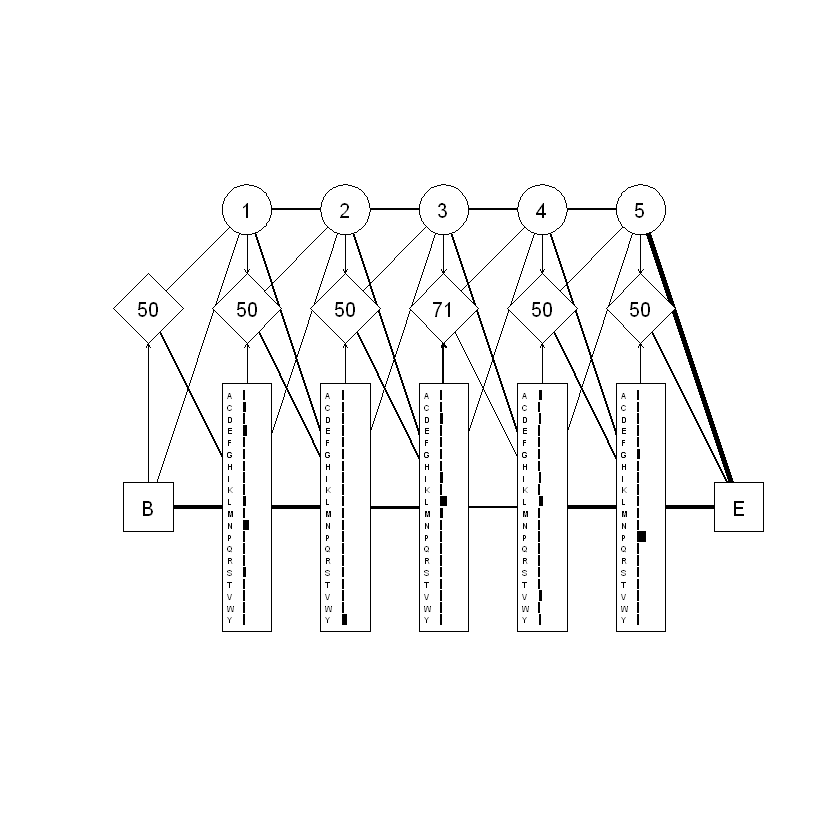

In [3]:
#As the weights of the amino acid are uniform, no weights have been assigned separately
#using pseudocount and mentioning residues as amino acid
seqAlignment.PHMM = derivePHMM(seqAlignment, residues = "AMINO", pseudocounts = "Laplace")

#creating topology of profile HMM using PHMM
plot(seqAlignment.PHMM)

The three state types listed above in the plot as circles -delete state, diamonds-insert state and rectangles-match state, respectively. The states are linked by transition probabilities shown as weighted lines in the graph. B and E are the begin and end position. There is only one insert state and 5 match states. The horizontal bars in rectangles represent the emission probabilities for each residue in the alphabet (in this case the amino acid alphabet) at each position in the model. Numbers in the delete states are simply model module numbers, while those in the insert states are the probabilities of remaining in the current insert state at the next emission cycle.

### Sequence Simulation

The following code simulates a list of 10 random sequences from the amino acid matrix profile HMM:
Sequences are generated recursively using the transition and emission probabilities from within the model

In [4]:
#from observed data to simulate data
#length of the sequence
ltOfSeq <- list(length = 10)
suppressWarnings(RNGversion("3.5.0")) #loading the version to generate the sequences.
set.seed(9999) # setting the seed

#for loop to generate the sequences using the existing amino acid sequence matrix.
for(i in 1:10) ltOfSeq[[i]] <- generate(seqAlignment.PHMM, size = 20)

Gap symbols are emitted from delete states, if these gaps are not required they can be removed as follows:

In [5]:
#removing the "-" signal which were emmitted at the delete state
#lapply function in R, returns a list of the same length as input list object to remove the gaps.
ltOfSeq <- lapply(ltOfSeq, function(s) s[names(s) != "D"])

### Model Training

The following code trains the amino acids sequences profile HMM with the sequences simulated in the previous step using the Baum Welch algorithm.

In [6]:
#training the set with Laplace pseudocounts and Baum Welch algorithm.
seqAlignment2.PHMM <- train(seqAlignment.PHMM, ltOfSeq, method = "BaumWelch", 
                       deltaLL = 0.01, seqweights = NULL, pseudocounts = "Laplace")

Iteration 1 log likelihood = -180.4212 
Iteration 2 log likelihood = -172.0409 
Iteration 3 log likelihood = -171.1926 
Iteration 4 log likelihood = -170.6315 
Iteration 5 log likelihood = -170.2929 
Iteration 6 log likelihood = -170.102 
Iteration 7 log likelihood = -169.9889 
Iteration 8 log likelihood = -169.9132 
Iteration 9 log likelihood = -169.8555 
Iteration 10 log likelihood = -169.8076 
Iteration 11 log likelihood = -169.7656 
Iteration 12 log likelihood = -169.7275 
Iteration 13 log likelihood = -169.6917 
Iteration 14 log likelihood = -169.6571 
Iteration 15 log likelihood = -169.6231 
Iteration 16 log likelihood = -169.5894 
Iteration 17 log likelihood = -169.5561 
Iteration 18 log likelihood = -169.5235 
Iteration 19 log likelihood = -169.4919 
Iteration 20 log likelihood = -169.4619 
Iteration 21 log likelihood = -169.4337 
Iteration 22 log likelihood = -169.4077 
Iteration 23 log likelihood = -169.384 
Iteration 24 log likelihood = -169.3628 
Iteration 25 log likelihood

This operation took 30 expectation-maximization iterations to converge to the specified delta log-likelihood threshold of 0.01.